## Defining the question.

### a) Specifying the data analysis question

###### I would like to understand the financial situation in the 4 countries; Kenya, Rwanda, Uganda and Tanzania, based on how many of their citizens have access to a personal commercial bank account. I would like to build a model to predict the individuals exhibiting a specific characteristic that are more likely to have a personal bank account.

### b) Defining the metric of success

###### To term my analysis successful, I should have been able to drawn several conclusions concerning finanicial inclusion in the four countries, pertaining to the different variables in the dataset and successfully build a model that predicts the group of individuals most likely to have a pbank account.

### c) Understanding the context

###### The data in the dataset was obtained from Finscope Survey. It details the records of citizens with bank accounts and those without,for adults 16 years and older, in the countries; Kenya in 2018, Uganda in 2018, Tanzania in 2017 and Rwanda in 2016. 

### Reading the Data

In [1]:
# Importing the relevant libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset.
Bank_access_dataset = pd.read_csv("/content/Financial Dataset - 1.csv")

In [2]:
# Setting the figure size and titleweight parameters for all the graphs that will be plotted.

plt.rcParams['figure.figsize']= (10,8)
plt.rcParams['axes.titlesize']= 15
plt.rcParams['axes.labelsize']= 10
plt.rcParams['axes.titleweight'] = 700

### Checking our data

In [3]:
# I created a funtion that displayes the shape of the dataset, the top and bottom previews of the dataset and the
# datatypes of our columns.
def dataset_information(dataset):
  print("The dataset has "+ str(dataset.shape[0]) +" rows and " + str(dataset.shape[1]) + " columns.")
  print("*"*100)
  print(dataset.head())
  print("*"*100)
  print(dataset.tail())
  print("*"*100)
  print(Bank_access_dataset.dtypes)


In [4]:
# Viewing the shape, datatypes and top and bottom of the dataset.

dataset_information(Bank_access_dataset)

The dataset has 23524 rows and 13 columns.
****************************************************************************************************
  country  year  ...              Level of Educuation                Type of Job
0   Kenya  2018  ...              Secondary education              Self employed
1   Kenya  2018  ...              No formal education       Government Dependent
2   Kenya  2018  ...  Vocational/Specialised training              Self employed
3   Kenya  2018  ...                Primary education  Formally employed Private
4   Kenya  2018  ...                Primary education        Informally employed

[5 rows x 13 columns]
****************************************************************************************************
      country  year  ...  Level of Educuation    Type of Job
23519  Uganda  2018  ...  No formal education   Other Income
23520  Uganda  2018  ...  Secondary education   Other Income
23521  Uganda  2018  ...    Primary education   Other Income
23

### Tidying the dataset

In [6]:
# Detecting missing values in the dataset.

Bank_access_dataset.isnull().sum()

country                   14
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [7]:
# There seems to be a number of records with missing values. As extrapolation is not possible for some of the columns like Type of Job and building of a model
# would not be possible with missing values, I decided to drop the records.

Bank_access_dataset =Bank_access_dataset.dropna()

In [8]:
# Replacing the values Yes with 1 and No with 0 in columns Has a Bank account and Cell Phone Access.


#Bank_access_dataset[['Has a Bank account', 'Cell Phone Access']]=Bank_access_dataset[['Has a Bank account', 'Cell Phone Access']].replace('Yes', 1).replace('No', 0)

In [9]:
# Renaming the column The relathip with head with Relationship with the household head.

Bank_access_dataset.columns = Bank_access_dataset.columns.str.replace("The relathip with head", "Relationship_with_household_head")

In [10]:
# Detecting anomalies
# A number of columns in the datasets have only a fixed set of possible values. I am trying to detect an anomaly by displaying the unique values in those dataset columns.
print(list(Bank_access_dataset['country'].unique()))
print("*"*100)
print(list(Bank_access_dataset['gender_of_respondent'].unique()))
print("*"*100)
print(list(Bank_access_dataset['Type of Location'].unique()))
print("*"*100)
print(list(Bank_access_dataset['marital_status'].unique()))
print("*"*100)
print(list(Bank_access_dataset['Level of Educuation'].unique()))
print("*"*100)
print(list(Bank_access_dataset['Type of Job'].unique()))
print("*"*100)
print(list(Bank_access_dataset['Relationship_with_household_head'].unique()))

# We see that in the column Level of Education, there are records with their values as 6, which is an anomaly as there is no level of education reffered to as 6.
# The records with 6 as their value of Level of education therefore have to be dropped.

anomaly = Bank_access_dataset['Level of Educuation'] == '6'
bank_dataset = Bank_access_dataset[~anomaly]

['Kenya', 'Rwanda', 'Tanzania', 'Uganda']
****************************************************************************************************
['Female', 'Male']
****************************************************************************************************
['Rural', 'Urban']
****************************************************************************************************
['Married/Living together', 'Widowed', 'Single/Never Married', 'Divorced/Seperated', 'Dont know']
****************************************************************************************************
['Secondary education', 'No formal education', 'Vocational/Specialised training', 'Primary education', 'Tertiary education', 'Other/Dont know/RTA', '6']
****************************************************************************************************
['Self employed', 'Government Dependent', 'Formally employed Private', 'Informally employed', 'Formally employed Government', 'Farming and Fishing', 'Remittance Dep

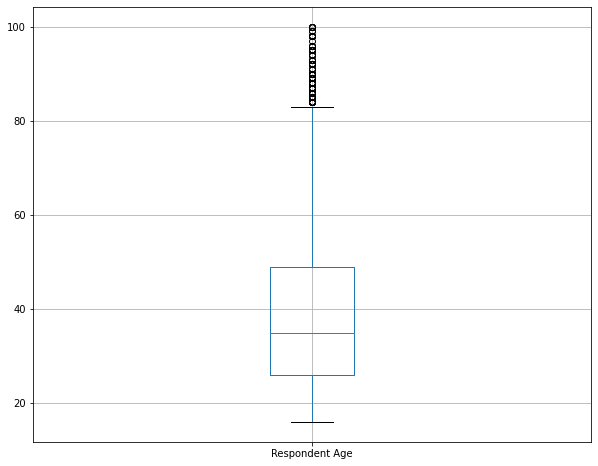

In [11]:
# Detecting outliers
bank_dataset.boxplot(column=['Respondent Age'], grid= True)

# From the box plot we observe that there are quite a number of individuals between the age of 80 and 100. However, this is not out of the ordinary.

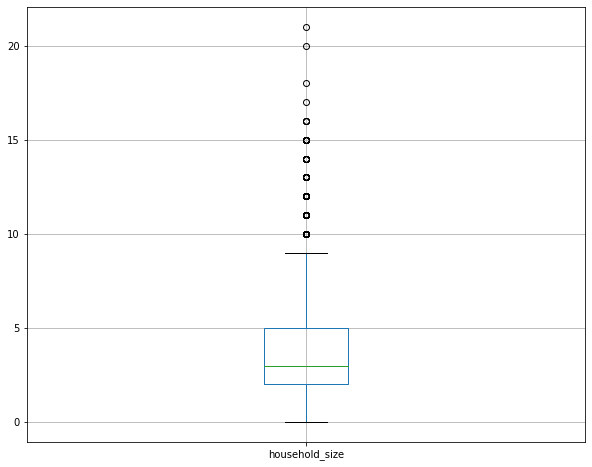

In [12]:
bank_dataset.boxplot(column= ['household_size'], grid= True)

# From the boxplot, we observe that there are a number of household with a large number of individuals, some even exceeding 20.

### Exploratory analysis

#### Univariate Analysis

In [13]:
# Dividing the dataset into two, for individuals with and without bank accounts.
Yes = bank_dataset[bank_dataset['Has a Bank account']== 'Yes']

No = bank_dataset[bank_dataset['Has a Bank account']== 'No']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


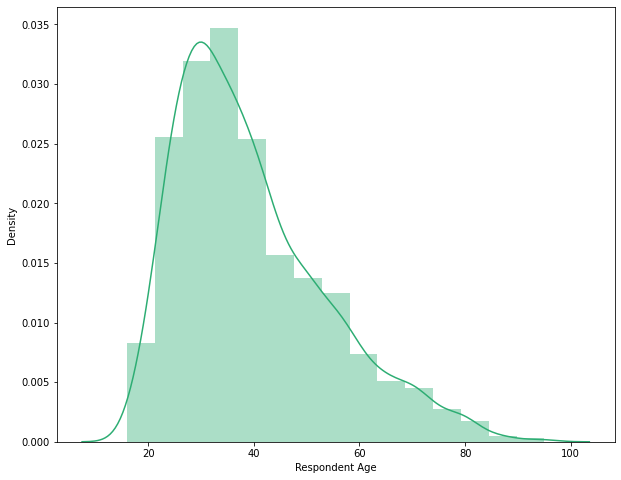

In [14]:
# Displaying the distribution of the age of individuals with bank accounts.
def histplotter(dataset, column):
  sns.distplot(dataset[column], bins=15, hist= True, color='#2DAD73')
  
histplotter(Yes, 'Respondent Age')
# Most individuals with bank accounts tend to be between 20 and 40 years old.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


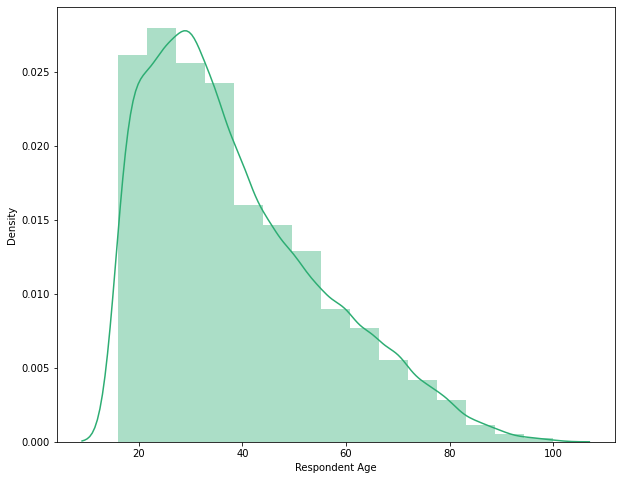

In [15]:
# Investigating the distribution of ages of individuals without bank accounts.
histplotter(No, 'Respondent Age')

# The largest number of people without bank accounts lies between the ages of 16 and 40. The distribution is a bit similar to the one of individuals with
# pesonal bank accounts and I would conclude that a larger portion of people involved in the survey were between 16 and 20 years old.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


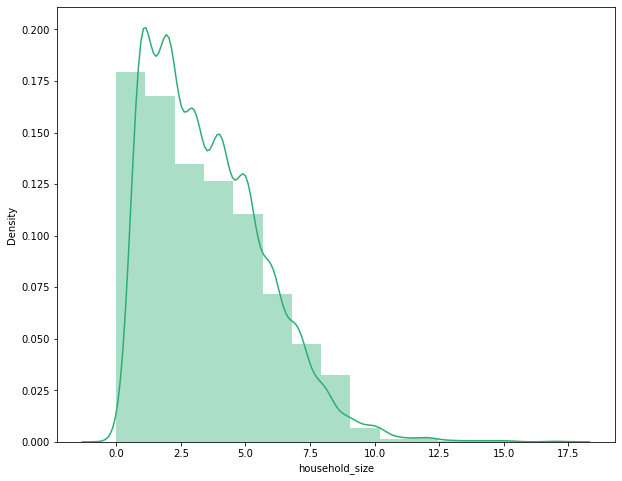

In [16]:
# Displaying the distribution of number of households among individuals with bank accounts.
histplotter(Yes, 'household_size')

# Most households have between 0 and 2.5 members.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


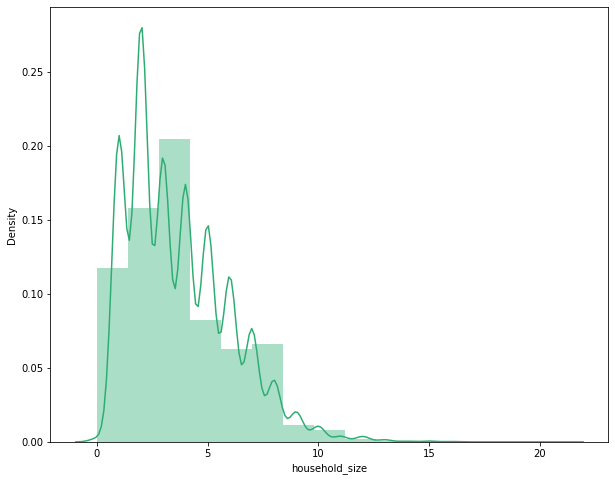

In [17]:
# Displaying the distribution of household size among individuals without bank accounts.
histplotter(No, 'household_size')

# Relative to the distribution of household size for individuals with bank accounts, the histogram below tells us that individuals withot bank accounts
# tend to have larger families. However, a correlation is not guaranteed.

In [18]:
# 

#### Bivariate analysis

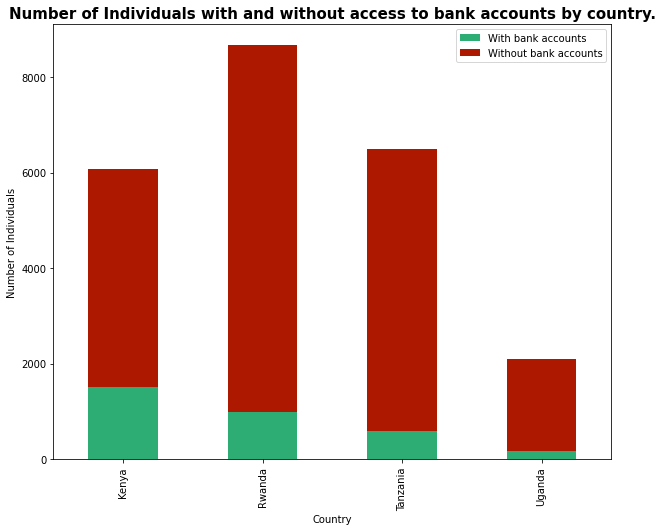

In [19]:
# To get an idea of the financial inclusion situation in the four countries, we may want to plot stacked graphs displaying the number of people
# per country with and without bank accounts.
# First we will need to group the data by country and find the counts for individuals with and without bank accounts.

d1 =Yes['Has a Bank account'].groupby(by=Yes['country']).count() # ------ creating a dataframe with the number of records with the column [Has a Bank account] having a value 'Yes'
d2 =No['Has a Bank account'].groupby(by=No['country']).count() # ------ creating a dataframe with the number of records with the column [Has a Bank account] having a value 'No'

combined = pd.merge(d1, d2, on='country') # ------merging the two datasets.
# I renamed the columns for accurate depiction in the legends.
combined.columns = combined.columns.str.replace('Has a Bank account_x','With bank accounts').str.replace('Has a Bank account_y','Without bank accounts')

# I defined a function plotgraph to plot my stacked graphs as I would need to plot about six.
def plotgraph(dataset, xaxislabel, yaxislabel, title):
  dataset.plot(kind='bar', stacked= True, color=['#2DAD73','#AD1800'])
  plt.xlabel(xaxislabel)
  plt.ylabel(yaxislabel)
  plt.title(title)
  plt.show()

plotgraph(combined, "Country", "Number of Individuals", "Number of Individuals with and without access to bank accounts by country.")

# From the graph below, I am able to draw the following conclusions:
# 1. The sample population surveyed consisted mostly of citizens from Rwanda.
# 2. A majority of the sample population do not have access to bank accounts.
# 3. Uganda has the lowest population of citizens in the sample data.

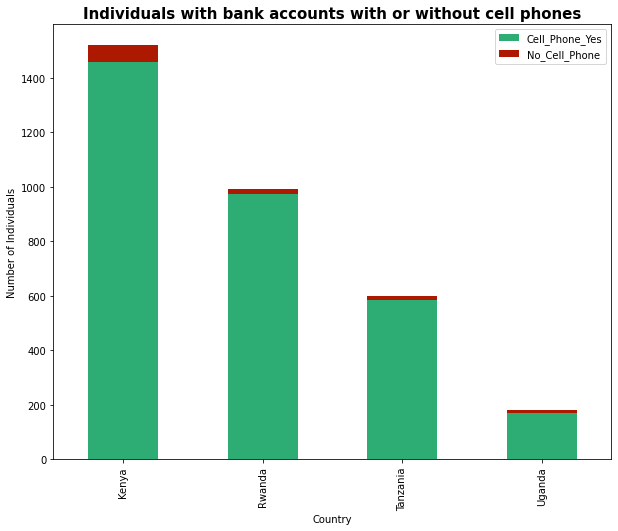

In [20]:
# The columns Type of Location, Cell phone access and gender of the respondent both have only two possible values and hence counts for both of them need to be aggregated, for both
# individuals with and without bank accounts.
# We shall begin with the ones with access to a bank account and have the ones without just below them.

# The below function takes the parameters: d(the dataset you wish to obtain data for plotting from), column1(this is the column you wish to group by.),column2(this is the column in which you wish to count values),
# condtion1(this is the condition inserted in the first dataframe boolean) and condition2(the condition inserted in the second dataframe boolean.)
# The function first picks two columns from the user inputted dataset d; column country and another column defined by the user, it then creates two dataframes, that
# satisfy the conditions, condition1 and condition2 respectively. The two dataframes are then merged. The merged dataframe is the output.
# By using this function I am able to put the computed values per country, that satisfy two specified conditions into two columns. This will make it easier for me
# to plot the stacked bar graph.
def mycounter(d, column1, column2, condition1, condition2):
  dataset = d[[column1,column2]]
  data1 = dataset[dataset[column2]== condition1].groupby(by=column1).count()
  data2 = dataset[dataset[column2]== condition2].groupby(by=column1).count()
  merger = pd.merge(data1, data2, on= column1)
  return merger

# I will begin with the Cell Phone Access column and plot for individuals with bank accounts.
# The merged dataset will have two columns for those with access to cell phones and those
m =mycounter(Yes, 'country','Cell Phone Access', 'Yes', 'No')

# Renaming the columns is necessary so that the bar graph legends relay the correct information.
m.columns = m.columns.str.replace('Cell Phone Access_x', 'Cell_Phone_Yes').str.replace('Cell Phone Access_y','No_Cell_Phone')
  
# Plotting my stacked graph.
plotgraph(m, "Country", "Number of Individuals", "Individuals with bank accounts with or without cell phones")

# From the graph I am able to conclude that :
# 1. From the sample population, Kenya has the highest number of citizens with bank accounts while Uganda has the least.
# 2. A majority of individuals with bank accounts have access to cell phones.


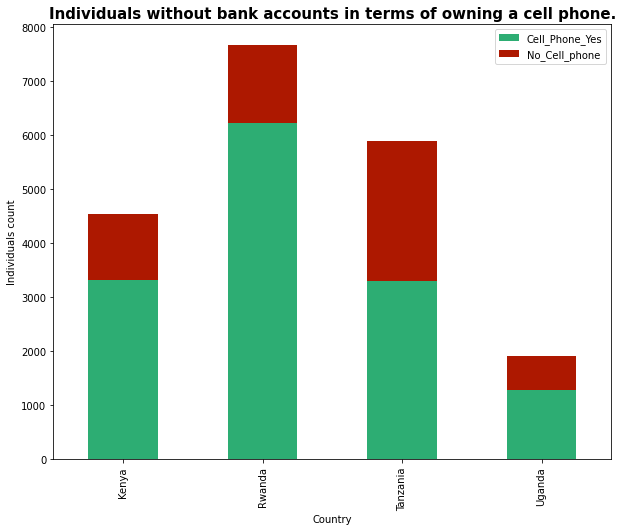

In [21]:
# I will plot a similar graph in this cell, but with the dataset containing individuals without a bank account.
# I firsted need to created my merged dataset with columns for with and without cell phones
me = mycounter(No, 'country','Cell Phone Access', 'Yes', 'No')

me.columns = me.columns.str.replace('Cell Phone Access_x', 'Cell_Phone_Yes').str.replace('Cell Phone Access_y','No_Cell_phone')
# Renaming the columns so as to specify what I want to appear in the legends

# Plotting the stacked bar graph
plotgraph(me, "Country", "Individuals count", "Individuals without bank accounts in terms of owning a cell phone.")

# From the graph below, I am able to conclude:
# 1. From the sample population, Rwanda has the highest number of citizens not having a bank account and Uganda the least. This might be due to Rwanda and Uganda
#    having the highest and the lowest number of citizens, respectively, in the sample population.
# 2. Even though a majority of indviduals have access to a cell phones, the portion without access to cell phones is still larger in this graph
#    relative to the graph if Individuals with bank accounts.
# 3.

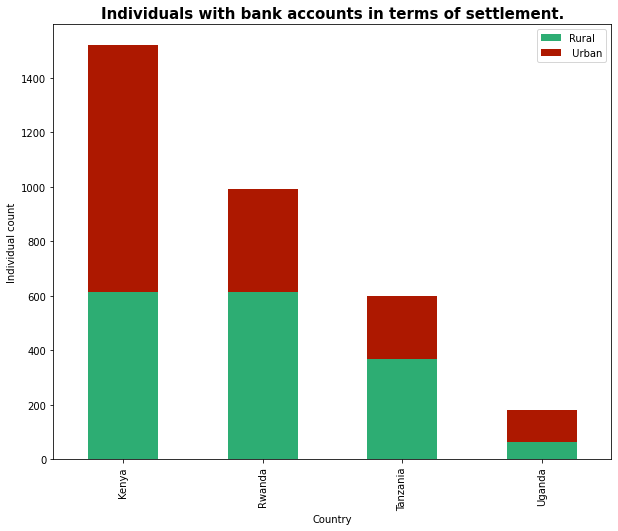

In [22]:
# Plotting a stacked bar graph for individuals with bank accounts by the type of locations, either urban or rural.
merged =mycounter(Yes,'country','Type of Location', 'Rural', 'Urban') # ------ creating two dataframes and merging them so as to create my columns.
merged.columns = merged.columns.str.replace('Type of Location_x', 'Rural').str.replace('Type of Location_y',' Urban') # ------ renaming columns.

plotgraph(merged, "Country", "Individual count", "Individuals with bank accounts in terms of settlement.") # ------plotting my graph

# From the plotted graph, I am able to draw the following conclusion:
# 1. Kenya and Uganda have their larger percentage of individuals with bank accounts living in urban areas.
# 2. A larger portion of individuals with bank accounts in Tanzania and Rwanda live in rural areas.

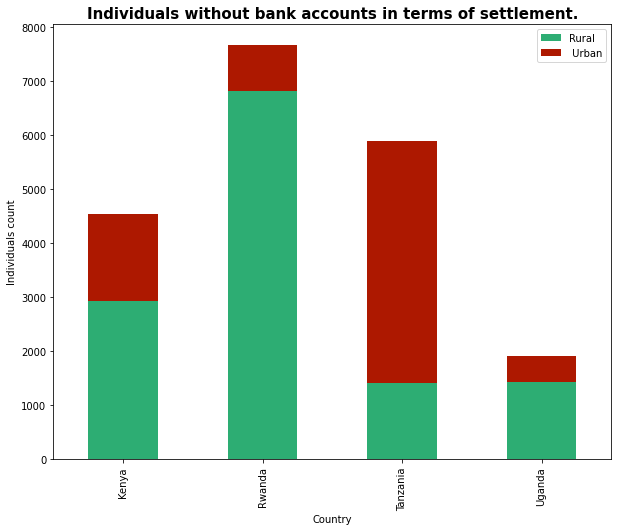

In [23]:
# Plotting the same as above, but with Individuals without bank accounts.
mer = mycounter(No, 'country','Type of Location', 'Rural', 'Urban')
mer.columns = mer.columns.str.replace('Type of Location_x', 'Rural').str.replace('Type of Location_y',' Urban')

plotgraph(mer, "Country", "Individuals count", "Individuals without bank accounts in terms of settlement.")

# From observing the graph, I am able to conclude that:
# 1. A majority of Rwanda's citizens without bank accounts reside in rural settlements. As this seems to be the case in the graph above as well,
#    it is reasonable to conclude that a majority of Rwanda's citizens in the sample population reside in rural settlements.
# 2. Kenya and Uganda have a larger population of citizens without bank accounts residing in rural areas.
# 3. Tanzania has a majority of citizens without bank accounts residing in urban settlements. 

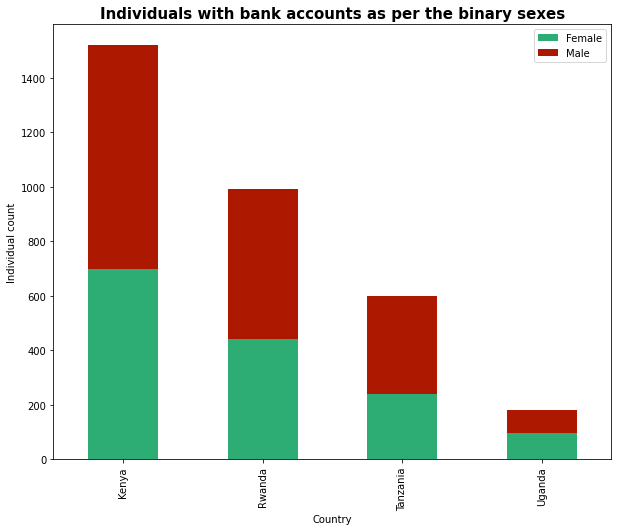

In [24]:
# Plotting a stacked bar graph of for individuals with bank accounts in terms of binary sexes.

merger =mycounter(Yes, 'country','gender_of_respondent', 'Female', 'Male') ## executing function mycounter
merger.columns = merger.columns.str.replace('gender_of_respondent_x','Female').str.replace('gender_of_respondent_y','Male') ## renaming the columns to what I want to appear in the legends.

plotgraph(merger, "Country", "Individual count", "Individuals with bank accounts as per the binary sexes")


# From the plotted graph, I am able to come to the following conclusions:
# 1. A majority of individuals with bank accounts in Kenya, Rwanda and Tanzania happen to be male.
# 2. A majority of individuals with bank accounts in Uganda are female, however, the margin is really small.


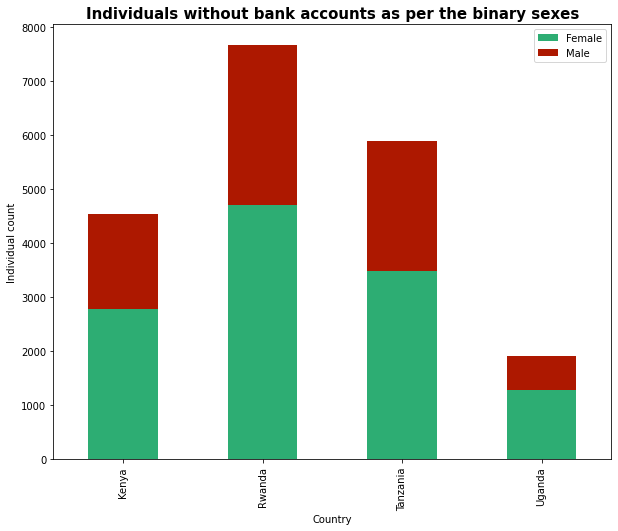

In [25]:
# Plotting a stacked bar graph of for individuals with bank accounts in terms of binary sexes.
merg =mycounter(No, 'country','gender_of_respondent', 'Female', 'Male') ## executing function my counter
merg.columns = merg.columns.str.replace('gender_of_respondent_x','Female').str.replace('gender_of_respondent_y','Male') ## renaming the columns to what I want to appear in the legends.

plotgraph(merg, "Country", "Individual count", "Individuals without bank accounts as per the binary sexes")

# From the graph below, I am able to conclude that:
# 1. A majority of individuals without bank accounts, in all the four countries are female.

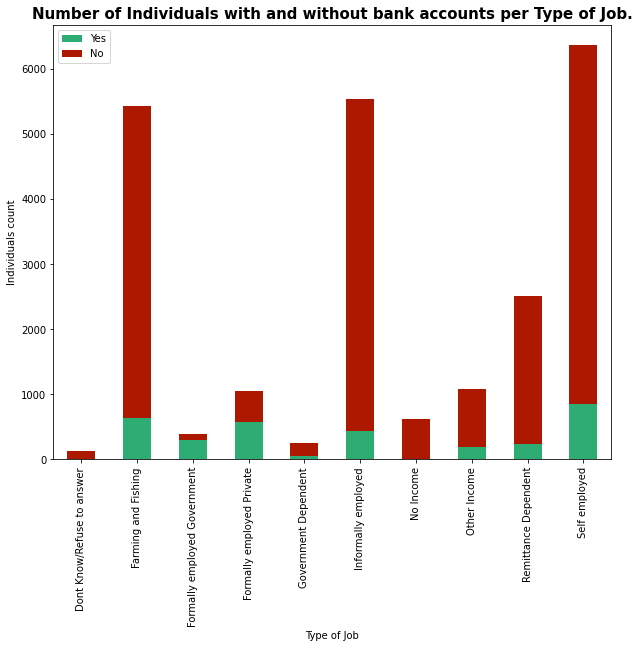

In [26]:
# Plotting the number of individuals with diffrent type of jobs having or not having bank accounts.

erging = mycounter(bank_dataset, 'Type of Job', 'Has a Bank account', 'Yes', 'No')
erging.columns = erging.columns.str.replace('Has a Bank account_x','Yes').str.replace('Has a Bank account_y', 'No')

plotgraph(erging, "Type of Job", "Individuals count", "Number of Individuals with and without bank accounts per Type of Job.")

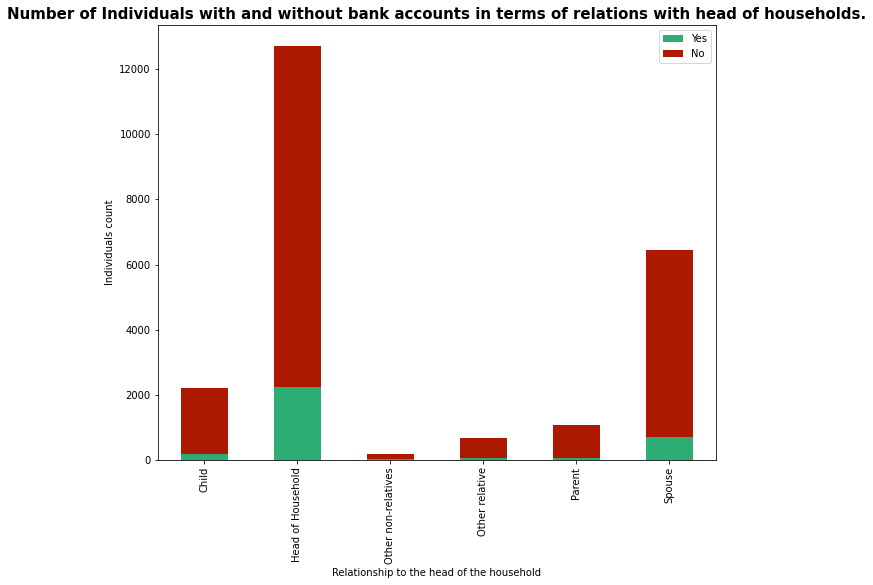

In [27]:
# Plotting a graph displaying the number of individuals having or not having bank accounts in terms of their relations to the head of the household.
merging = mycounter(bank_dataset, 'Relationship_with_household_head', 'Has a Bank account', 'Yes', 'No')
merging.columns = merging.columns.str.replace('Has a Bank account_x','Yes').str.replace('Has a Bank account_y', 'No')

plotgraph(merging, "Relationship to the head of the household", "Individuals count", "Number of Individuals with and without bank accounts in terms of relations with head of households.")

# From the graph below, I can draw the following conclusions:
# 1. Heads of households tend to have a higher likelyhood to have bank accounts.

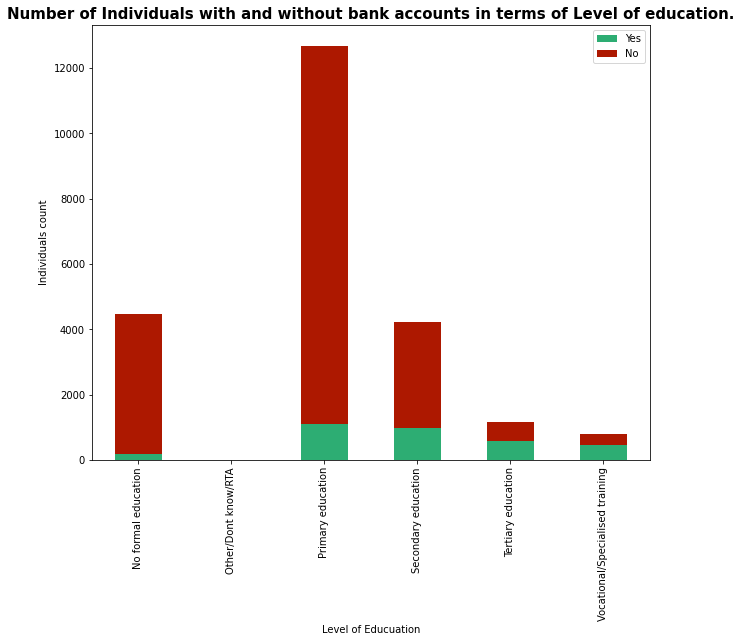

In [28]:
# Plotting a graph to display the number of individuals with and without bank accounts in terms of their level of education.
fusing = mycounter(bank_dataset, 'Level of Educuation', 'Has a Bank account', 'Yes', 'No')
fusing.columns = fusing.columns.str.replace('Has a Bank account_x','Yes').str.replace('Has a Bank account_y', 'No')

plotgraph(fusing, "Level of Educuation", "Individuals count", "Number of Individuals with and without bank accounts in terms of Level of education.")

# From the following graph, I am able to conclude that:
# 1. Individuals  with a tertiary education and vocational or specialised training have a higher percentage of their members having a bank account.

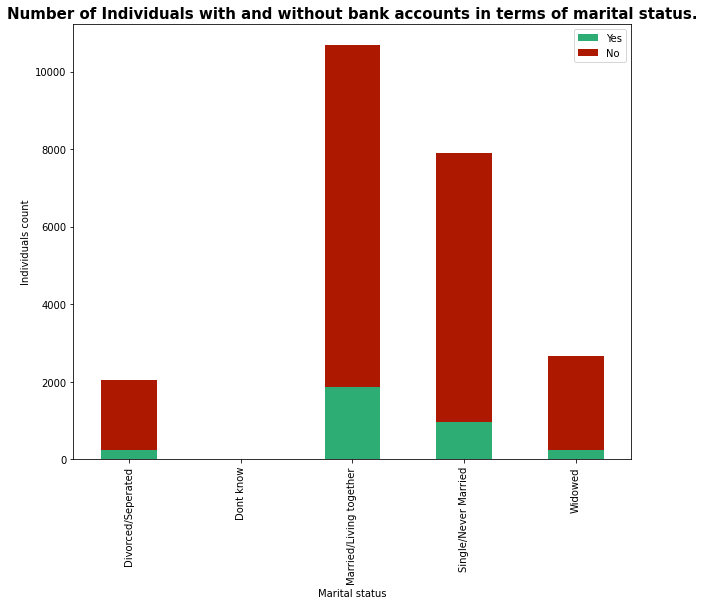

In [29]:
# Plotting a graph of individuals with and without bank accounts in terms of marital status.
coalesce =  mycounter(bank_dataset, 'marital_status', 'Has a Bank account', 'Yes', 'No')
coalesce.columns = coalesce.columns.str.replace('Has a Bank account_x','Yes').str.replace('Has a Bank account_y', 'No')

plotgraph(coalesce, "Marital status", "Individuals count", "Number of Individuals with and without bank accounts in terms of marital status.")

# From the graph below, I can conclude:
# 1. Couples that are living together have a higher number of individuals having bank accounts while those separated/divorced and the widowed have the least.

#### Mutlivariate Analysis

In [52]:
# Principle component analysis is usually applied to numerical variables. A majority of the columns in this dataset is categorical . Therefore, I am going to create
# a new dataset containing the individual counts of those with bank accounts in different categories. Remember the merged datasets we created during the bivariate analysis?
# I will merge those datasets, only the ones detailing individuals with bank accounts, to create a new dataset.

merge_process = pd.merge(m, merged, on='country')
merge_process

# We have successfully merged the first two, on cell phone access and settlement. We will now merge a third.

merge_all = pd.merge(merge_process, merger, on='country')
merge_all =merge_all.astype(float)

# The last dataset to be merged was the one detailing the counts of male and female individuals with bank accounts. 

# We can now begin working on our data.
# First we need to divide our dataset into our feature and label sets and then split the data into the training and test set.
y = merge_all.index
x = merge_all

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

# I then need to normalize or standardize my data.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train= sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Applying PCA

from sklearn.decomposition import PCA
pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
## Explained variance ratio

explained_var = pca.explained_variance_ratio_
print(explained_var)

# Training and making predictions

from sklearn.ensemble import RandomForestClassifier
classify = RandomForestClassifier(max_depth=2, random_state=0)
classify.fit(x_train, y_train)
y_predicted =classify.predict(x_test)

# Performance evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cf_mx = confusion_matrix(y_test, y_predicted)
print(cf_mx)
print('Accuracy', accuracy_score(y_test, y_predicted))

[9.25487071e-01 7.45129291e-02 4.62312350e-33]
[[0 0]
 [1 0]]
Accuracy 0.0


In [47]:
# Installing factor analyzer
!pip install factor_analyzer==0.2.3


In [57]:
# Factor Analysis

# We first have to test the adequacy of our dataset.

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(merge_all)
chi_square_value, p_value


(19.637502396849875, 0.040829436586815426)

### Implementing the solution

### Challenging the solution